Q1

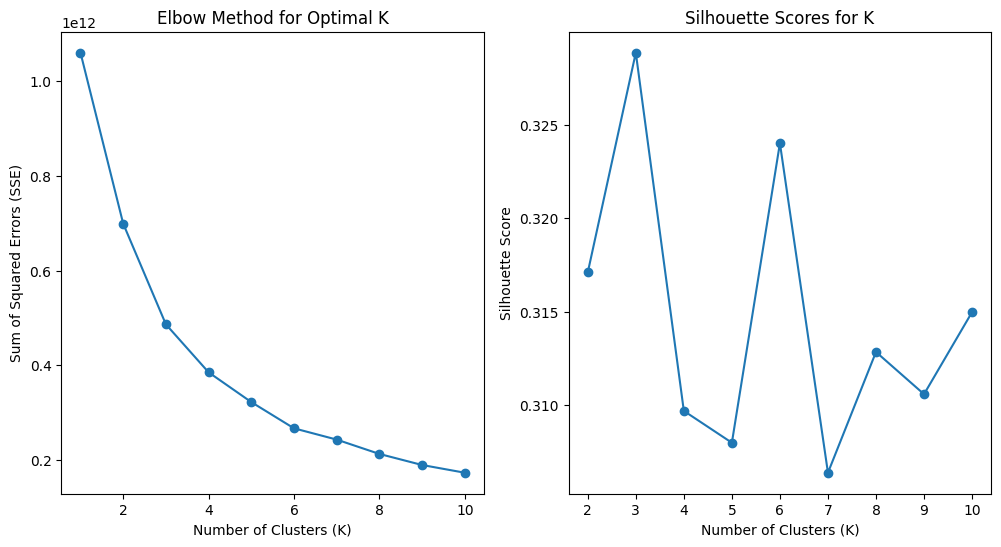

K-Means Clustering Labels: [0 1 2 ... 2 1 2]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
url = "https://drive.google.com/uc?id=1O_NwpJT-8xGfU_-3llUl2sgPu0xllOrX"
data = pd.read_csv(url)
X = data.iloc[:, :-1].values
sse = []
silhouette_scores = []
K_range = range(1, 11)
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    if K > 1:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')

plt.subplot(1, 2, 2)
plt.plot(K_range[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores for K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

kmeans_labels = kmeans.labels_
print(f"K-Means Clustering Labels: {kmeans_labels}")

Q2

In [ ]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.1 MB/s eta 0:00:00


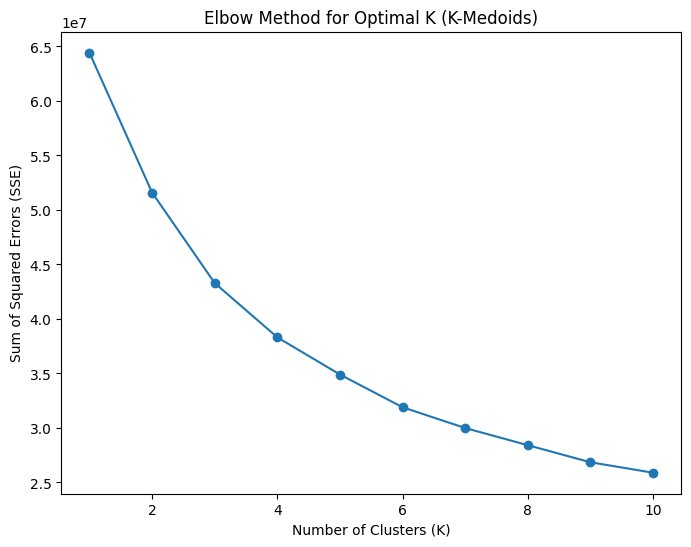

K-Medoids Clustering Labels: [0 2 1 ... 1 2 2]


In [ ]:
from sklearn_extra.cluster import KMedoids
from scipy.spatial.distance import cdist

sse_medoids = []

for K in K_range:
    kmedoids = KMedoids(n_clusters=K, random_state=42)
    kmedoids.fit(X)
    sse_medoids.append(np.sum(np.min(cdist(X, kmedoids.cluster_centers_, 'euclidean'), axis=1)))

plt.figure(figsize=(8, 6))
plt.plot(K_range, sse_medoids, marker='o')
plt.title('Elbow Method for Optimal K (K-Medoids)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

optimal_k_medoids = 3
kmedoids = KMedoids(n_clusters=optimal_k_medoids, random_state=42)
kmedoids.fit(X)

kmedoids_labels = kmedoids.labels_
print(f"K-Medoids Clustering Labels: {kmedoids_labels}")